In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-top100-celebrities-dataset/celebrity_data.csv


In [2]:
data = pd.read_csv("/kaggle/input/imdb-top100-celebrities-dataset/celebrity_data.csv")
data

,Rank,Name,Date_of_birth,height,Role,Awards,Famous_for,Birth_place
0,1,Sofia Boutella,"April 3, 1982",5′ 5″ (1.65 m),"['Actress', 'Soundtrack']",1 win & 2 nominations,Kingsman: The Secret Service (2014),"Bab El Oued, Algeria"
1,2,Ed Skrein,"March 29, 1983",6′ 1″ (1.85 m),"['Actor', 'Director', 'Writer']",2 wins & 2 nominations,Deadpool (2016),"Camden, London, England, UK"
2,3,Barry Keoghan,"October 18, 1992",5′ 8″ (1.73 m),['Actor'],11 wins & 76 nominations total,The Killing of a Sacred Deer (2017),"Dublin, Ireland"
3,4,Serinda Swan,"July 11, 1984",5′ 7″ (1.70 m),"['Actress', 'Producer', 'Director']",2 nominations,Coroner (2019–2022),"West Vancouver, British Columbia, Canada"
4,5,Alan Ritchson,"November 28, 1982",6′ 3″ (1.91 m),"['Actor', 'Producer', 'Director']",3 wins & 3 nominations,Teenage Mutant Ninja Turtles (2014),"Grand Forks, North Dakota, USA"
...,...,...,...,...,...,...,...,...
95,96,Kristin Minter,"November 22, 1965",5′ 8″ (1.73 m),['Actress'],1 nomination,ER (1995–2003),"Miami, Florida, USA"
96,97,Zac Efron,"October 18, 1987",5′ 8″ (1.73 m),"['Actor', 'Producer', 'Soundtrack']",35 wins & 44 nominations,17 Again (2009),"San Luis Obispo, California, USA"
97,98,Emma Corrin,"December 13, 1995",5′ 8″ (1.73 m),"['Actress', 'Music Department', 'Soundtrack']",10 wins & 10 nominations total,Lady Chatterley's Lover (2022),"Royal Tunbridge Wells, Kent, England, UK"
98,99,Kelly Reilly,"July 18, 1977",5′ 6″ (1.68 m),"['Actress', 'Producer']",7 wins & 12 nominations,Pride & Prejudice (2005),"Surrey, England, UK"


Let's see the columns in the dataset

In [3]:
list(data.columns)

['Rank',
 'Name',
 'Date_of_birth',
 'height',
 'Role',
 'Awards',
 'Famous_for',
 'Birth_place']

Total celebrities in the dataset.

In [4]:
all_unique_celebrities = list(data['Name'].unique())
all_unique_celebrities 

['Sofia Boutella',
 'Ed Skrein',
 'Barry Keoghan',
 'Serinda Swan',
 'Alan Ritchson',
 'Lee Sun-kyun',
 'Taylor Momsen',
 'Sydney Sweeney',
 'Jessica Parker Kennedy',
 'Staz Nair',
 'Emerald Fennell',
 'Timothée Chalamet',
 'Jacob Elordi',
 'Charlie Hunnam',
 'Michiel Huisman',
 'Michelle Monaghan',
 'Carey Mulligan',
 'Willa Fitzgerald',
 'Macaulay Culkin',
 'Nicolette Scorsese',
 'Margot Robbie',
 'Alison Oliver',
 'Julia Roberts',
 "Beverly D'Angelo",
 'Peter Billingsley',
 'Bae Doona',
 'Zack Snyder',
 'Melinda Dillon',
 'Donna Reed',
 'Florence Pugh',
 'Jena Malone',
 'Vera-Ellen',
 'Thomas Brodie-Sangster',
 'Millie Gibson',
 'Glen Powell',
 'Juno Temple',
 'Rosamund Pike',
 'Rachel Zegler',
 'Emma Stone',
 'Juliette Lewis',
 'Virginia Kull',
 'Cleopatra Coleman',
 'Fra Fee',
 'Alexandra Daddario',
 'Shelley Hennig',
 'Nicolas Cage',
 'Heike Makatsch',
 'Ellen Latzen',
 'Tom Blyth',
 "Myha'la",
 'Walker Scobell',
 'Hannah Waddingham',
 'Tom Cruise',
 'Bradley Cooper',
 'Archie Ma

In [5]:
len(all_unique_celebrities)

100

There are total 100 celebrities in the list.

#### Let's see the celebrities whose date of birth was pre 1950

In [6]:
import numpy as np

def fetching_year(value):  # April 3, 1982
    value = value.split(",")
    if len(value) > 1:
        return value[-1]
    else:
        return 0

In [7]:
data["year_of_birth"] = data["Date_of_birth"].apply(fetching_year)
#data["year_of_birth"] = data["year_of_birth"].astype(int)
data

,Rank,Name,Date_of_birth,height,Role,Awards,Famous_for,Birth_place,year_of_birth
0,1,Sofia Boutella,"April 3, 1982",5′ 5″ (1.65 m),"['Actress', 'Soundtrack']",1 win & 2 nominations,Kingsman: The Secret Service (2014),"Bab El Oued, Algeria",1982
1,2,Ed Skrein,"March 29, 1983",6′ 1″ (1.85 m),"['Actor', 'Director', 'Writer']",2 wins & 2 nominations,Deadpool (2016),"Camden, London, England, UK",1983
2,3,Barry Keoghan,"October 18, 1992",5′ 8″ (1.73 m),['Actor'],11 wins & 76 nominations total,The Killing of a Sacred Deer (2017),"Dublin, Ireland",1992
3,4,Serinda Swan,"July 11, 1984",5′ 7″ (1.70 m),"['Actress', 'Producer', 'Director']",2 nominations,Coroner (2019–2022),"West Vancouver, British Columbia, Canada",1984
4,5,Alan Ritchson,"November 28, 1982",6′ 3″ (1.91 m),"['Actor', 'Producer', 'Director']",3 wins & 3 nominations,Teenage Mutant Ninja Turtles (2014),"Grand Forks, North Dakota, USA",1982
...,...,...,...,...,...,...,...,...,...
95,96,Kristin Minter,"November 22, 1965",5′ 8″ (1.73 m),['Actress'],1 nomination,ER (1995–2003),"Miami, Florida, USA",1965
96,97,Zac Efron,"October 18, 1987",5′ 8″ (1.73 m),"['Actor', 'Producer', 'Soundtrack']",35 wins & 44 nominations,17 Again (2009),"San Luis Obispo, California, USA",1987
97,98,Emma Corrin,"December 13, 1995",5′ 8″ (1.73 m),"['Actress', 'Music Department', 'Soundtrack']",10 wins & 10 nominations total,Lady Chatterley's Lover (2022),"Royal Tunbridge Wells, Kent, England, UK",1995
98,99,Kelly Reilly,"July 18, 1977",5′ 6″ (1.68 m),"['Actress', 'Producer']",7 wins & 12 nominations,Pride & Prejudice (2005),"Surrey, England, UK",1977


In [8]:
list(data["year_of_birth"])

[' 1982',
 ' 1983',
 ' 1992',
 ' 1984',
 ' 1982',
 ' 1975',
 ' 1993',
 ' 1997',
 ' 1984',
 ' 1991',
 ' 1985',
 ' 1995',
 ' 1997',
 ' 1980',
 ' 1981',
 ' 1976',
 ' 1985',
 ' 1991',
 ' 1980',
 ' 1954',
 ' 1990',
 ' 1997',
 ' 1967',
 ' 1951',
 ' 1971',
 ' 1979',
 ' 1966',
 ' 1939',
 ' 1921',
 ' 1996',
 ' 1984',
 ' 1921',
 ' 1990',
 ' 2004',
 ' 1988',
 ' 1989',
 ' 1979',
 ' 2001',
 ' 1988',
 ' 1973',
 0,
 ' 1987',
 ' 1987',
 ' 1986',
 ' 1987',
 ' 1964',
 ' 1971',
 ' 1980',
 ' 1995',
 ' 1996',
 ' 2009',
 ' 1974',
 ' 1962',
 ' 1975',
 ' 1995',
 ' 1996',
 ' 1982',
 ' 1991',
 ' 1984',
 ' 1964',
 ' 1990',
 ' 1974',
 ' 1908',
 ' 1981',
 ' 1980',
 ' 1982',
 ' 1951',
 ' 1996',
 ' 1987',
 ' 2002',
 ' 1993',
 ' 1954',
 ' 1971',
 ' 1958',
 ' 1985',
 ' 1946',
 ' 1955',
 ' 1989',
 ' 1988',
 0,
 ' 1949',
 ' 1983',
 ' 1928',
 ' 1956',
 ' 1986',
 ' 1988',
 ' 1970',
 ' 1985',
 ' 1952',
 ' 1992',
 ' 1960',
 ' 1948',
 ' 1980',
 ' 1962',
 ' 1942',
 ' 1965',
 ' 1987',
 ' 1995',
 ' 1977',
 ' 1967']

In [9]:
data["year_of_birth"] = data["year_of_birth"].astype(int)
data

,Rank,Name,Date_of_birth,height,Role,Awards,Famous_for,Birth_place,year_of_birth
0,1,Sofia Boutella,"April 3, 1982",5′ 5″ (1.65 m),"['Actress', 'Soundtrack']",1 win & 2 nominations,Kingsman: The Secret Service (2014),"Bab El Oued, Algeria",1982
1,2,Ed Skrein,"March 29, 1983",6′ 1″ (1.85 m),"['Actor', 'Director', 'Writer']",2 wins & 2 nominations,Deadpool (2016),"Camden, London, England, UK",1983
2,3,Barry Keoghan,"October 18, 1992",5′ 8″ (1.73 m),['Actor'],11 wins & 76 nominations total,The Killing of a Sacred Deer (2017),"Dublin, Ireland",1992
3,4,Serinda Swan,"July 11, 1984",5′ 7″ (1.70 m),"['Actress', 'Producer', 'Director']",2 nominations,Coroner (2019–2022),"West Vancouver, British Columbia, Canada",1984
4,5,Alan Ritchson,"November 28, 1982",6′ 3″ (1.91 m),"['Actor', 'Producer', 'Director']",3 wins & 3 nominations,Teenage Mutant Ninja Turtles (2014),"Grand Forks, North Dakota, USA",1982
...,...,...,...,...,...,...,...,...,...
95,96,Kristin Minter,"November 22, 1965",5′ 8″ (1.73 m),['Actress'],1 nomination,ER (1995–2003),"Miami, Florida, USA",1965
96,97,Zac Efron,"October 18, 1987",5′ 8″ (1.73 m),"['Actor', 'Producer', 'Soundtrack']",35 wins & 44 nominations,17 Again (2009),"San Luis Obispo, California, USA",1987
97,98,Emma Corrin,"December 13, 1995",5′ 8″ (1.73 m),"['Actress', 'Music Department', 'Soundtrack']",10 wins & 10 nominations total,Lady Chatterley's Lover (2022),"Royal Tunbridge Wells, Kent, England, UK",1995
98,99,Kelly Reilly,"July 18, 1977",5′ 6″ (1.68 m),"['Actress', 'Producer']",7 wins & 12 nominations,Pride & Prejudice (2005),"Surrey, England, UK",1977


In [10]:
before_1950_birth = data[(data["year_of_birth"] < 1950) & (data["year_of_birth"] != 0) ]
before_1950_birth 

,Rank,Name,Date_of_birth,height,Role,Awards,Famous_for,Birth_place,year_of_birth
27,28,Melinda Dillon,"October 13, 1939",5′ 8″ (1.73 m),"['Actress', 'Soundtrack']",4 wins & 10 nominations total,Magnolia (1999),"Hope, Arkansas, USA",1939
28,29,Donna Reed,"January 27, 1921",5′ 3½″ (1.61 m),"['Actress', 'Soundtrack']",5 wins & 9 nominations total,It's a Wonderful Life (1946),"Denison, Iowa, USA",1921
31,32,Vera-Ellen,"February 16, 1921",5′ 4″ (1.63 m),"['Actress', 'Soundtrack']",1 win,White Christmas (1954),"Norwood, Ohio, USA",1921
62,63,James Stewart,"May 20, 1908",6′ 3″ (1.91 m),"['Actor', 'Director', 'Producer']",31 wins & 21 nominations total,Vertigo (1958),"Indiana, Pennsylvania, USA",1908
75,76,Alan Rickman,"February 21, 1946",6′ 1″ (1.85 m),"['Actor', 'Writer', 'Director']",19 wins & 38 nominations total,Die Hard (1988),"Hammersmith, London, England, UK",1946
80,81,Anita Dobson,"April 29, 1949",5′ 3″ (1.60 m),['Actress'],NaN,Red Dwarf (1993– ),"Stepney, London, England, UK",1949
82,83,Rosemary Clooney,"May 23, 1928",5′ 6″ (1.68 m),"['Actress', 'Writer', 'Music Department']",1 win & 3 nominations total,White Christmas (1954),"Maysville, Kentucky, USA",1928
91,92,Bonnie Bedelia,"March 25, 1948",5′ 4″ (1.63 m),"['Actress', 'Soundtrack']",3 wins & 5 nominations total,Die Hard (1988),"New York City, New York, USA",1948
94,95,Harrison Ford,"July 13, 1942",6′ 1″ (1.85 m),"['Actor', 'Writer', 'Producer']",45 wins & 58 nominations total,Raiders of the Lost Ark (1981),"Chicago, Illinois, USA",1942


In [11]:
len(before_1950_birth)

9


Analyzing the Forbes dataset of celebrities using Pandas, NumPy, and Matplotlib offers numerous opportunities for exploring trends, relationships, and insights. Here are several possible questions and analyses you could perform:

Descriptive Statistics:


What are the most common roles among celebrities?

How does the distribution of heights look like?

What is the average age of celebrities based on their date of birth?

What is the most common birthplace among celebrities?
Temporal Analysis:

How has the number of celebrities changed over the years?
Is there any trend in the types of roles celebrities hold over time?
Are there any patterns in the distribution of awards received over time?
Is there a correlation between date of birth and fame?
Comparison:

How does the distribution of heights differ based on role (e.g., actors vs. athletes)?
Are there differences in fame based on birthplace?
Do celebrities with awards tend to be ranked higher?
Correlation Analysis:

Is there a correlation between height and rank?
Do celebrities with more awards tend to be more famous?
Is there a relationship between date of birth and the role of the celebrity?
Visualization:

Create histograms or box plots to visualize the distribution of ranks, heights, or ages.
Use scatter plots to explore relationships between variables like rank and height, or fame and awards.
Plot bar charts to compare the frequency of different roles or birthplaces.
Text Analysis:

Perform text analysis on the "Famous_for" column to identify common themes or keywords associated with celebrity fame.
Use natural language processing techniques to extract insights from the "Famous_for" column.
Dimensionality Reduction:

Apply dimensionality reduction techniques like PCA (Principal Component Analysis) to explore relationships among variables and reduce the dataset's complexity.
Visualize the dataset in lower-dimensional space to identify clusters or patterns.
Outlier Detection:

Identify outliers in variables like height or age that may indicate errors or unusual cases.
Investigate outliers to understand whether they represent unique cases or data quality issues.
Feature Engineering:

Create new features based on existing ones, such as extracting the month or year from the date of birth or birthplace features.
Combine or transform features to better represent relationships or trends in the data.
Predictive Modeling:

Build predictive models to forecast future trends in celebrity ranks or fame.
Use regression models to predict rank based on other variables like height, awards, or role.
By exploring these questions and conducting various analyses, you can gain valuable insights into the Forbes dataset of celebrities and uncover interesting patterns and trends within the data.

What are the most common roles among celebrities?

In [12]:
data["Role"]

0                         ['Actress', 'Soundtrack']
1                   ['Actor', 'Director', 'Writer']
2                                         ['Actor']
3               ['Actress', 'Producer', 'Director']
4                 ['Actor', 'Producer', 'Director']
                          ...                      
95                                      ['Actress']
96              ['Actor', 'Producer', 'Soundtrack']
97    ['Actress', 'Music Department', 'Soundtrack']
98                          ['Actress', 'Producer']
99                  ['Actor', 'Writer', 'Producer']
Name: Role, Length: 100, dtype: object

How does the distribution of heights look like?

In [13]:
def height_in_cm(value):
    #5′ 5″ (1.65 m)
    try:
        # Split the string to extract feet and inches
        parts = value.split('(')[1]
        value = parts.split(' ')[0]
        value = value.replace(".", "")

        return value
    
    except Exception as e:
        return "NA"

In [14]:
data["height_in_m"] = data["height"].apply(height_in_cm)
data

,Rank,Name,Date_of_birth,height,Role,Awards,Famous_for,Birth_place,year_of_birth,height_in_m
0,1,Sofia Boutella,"April 3, 1982",5′ 5″ (1.65 m),"['Actress', 'Soundtrack']",1 win & 2 nominations,Kingsman: The Secret Service (2014),"Bab El Oued, Algeria",1982,165
1,2,Ed Skrein,"March 29, 1983",6′ 1″ (1.85 m),"['Actor', 'Director', 'Writer']",2 wins & 2 nominations,Deadpool (2016),"Camden, London, England, UK",1983,185
2,3,Barry Keoghan,"October 18, 1992",5′ 8″ (1.73 m),['Actor'],11 wins & 76 nominations total,The Killing of a Sacred Deer (2017),"Dublin, Ireland",1992,173
3,4,Serinda Swan,"July 11, 1984",5′ 7″ (1.70 m),"['Actress', 'Producer', 'Director']",2 nominations,Coroner (2019–2022),"West Vancouver, British Columbia, Canada",1984,170
4,5,Alan Ritchson,"November 28, 1982",6′ 3″ (1.91 m),"['Actor', 'Producer', 'Director']",3 wins & 3 nominations,Teenage Mutant Ninja Turtles (2014),"Grand Forks, North Dakota, USA",1982,191
...,...,...,...,...,...,...,...,...,...,...
95,96,Kristin Minter,"November 22, 1965",5′ 8″ (1.73 m),['Actress'],1 nomination,ER (1995–2003),"Miami, Florida, USA",1965,173
96,97,Zac Efron,"October 18, 1987",5′ 8″ (1.73 m),"['Actor', 'Producer', 'Soundtrack']",35 wins & 44 nominations,17 Again (2009),"San Luis Obispo, California, USA",1987,173
97,98,Emma Corrin,"December 13, 1995",5′ 8″ (1.73 m),"['Actress', 'Music Department', 'Soundtrack']",10 wins & 10 nominations total,Lady Chatterley's Lover (2022),"Royal Tunbridge Wells, Kent, England, UK",1995,173
98,99,Kelly Reilly,"July 18, 1977",5′ 6″ (1.68 m),"['Actress', 'Producer']",7 wins & 12 nominations,Pride & Prejudice (2005),"Surrey, England, UK",1977,168


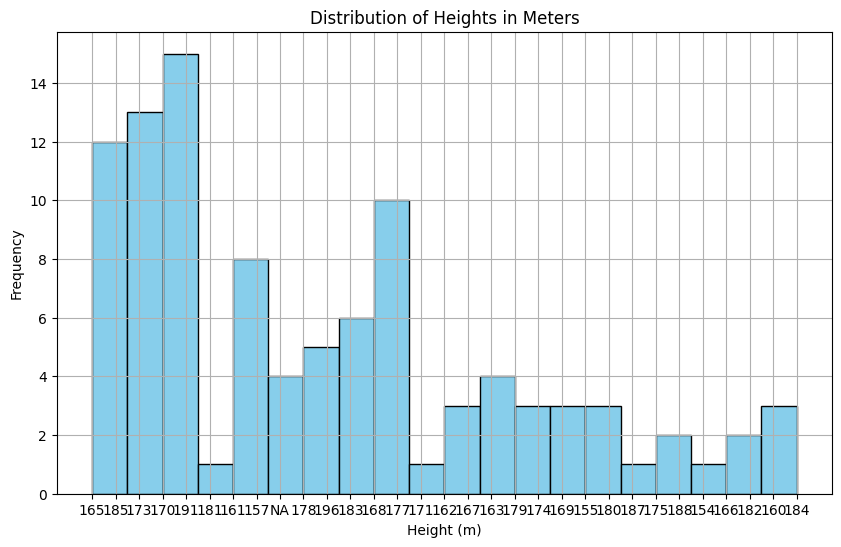

In [15]:
import matplotlib.pyplot as plt

# Assuming data["height_in_m"] contains the heights in meters

# Plotting the heights
plt.figure(figsize=(10, 6))
plt.hist(data["height_in_m"].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Heights in Meters')
plt.xlabel('Height (m)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
